# Importing  Libraires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

In [4]:
athlete = pd.read_csv(r"//content//archive (6).zip")
noc = pd.read_csv("/content/noc_regions.csv")

#  Creating copy of the Datasets

In [5]:
ath = athlete.copy()
nat = noc.copy()

#  Data  Explanation

In [6]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
ath.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
ath.shape

(271116, 15)

In [9]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [11]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
ath.shape

(271116, 15)

In [13]:
ath.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


# Data Manupulation And  Data Cleaning

1. Add a one column "region" to the ath DataFrame. And the rerign coulmn should have the region accordings to the elements in the NOC elements of the "nat" Dataframe.

In [14]:
at = ath.merge(nat, how="left", on="NOC")
at.drop(['NOC', 'notes'], axis=1, inplace=True, errors='ignore')


In [15]:
at.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [16]:
region_col = ath["NOC"].map(nat.set_index("NOC")["region"])

# Check if 'region' column already exists; if it does, update it; otherwise, insert it
if 'region' in ath.columns:
    ath['region'] = region_col
else:
    ath.insert(7, 'region', region_col)


In [17]:
ath.head()


,ID,Name,Sex,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


2. Drop the colomns "NOC" from the DataFrame "ath

In [18]:
ath.drop("NOC",inplace= True, axis=1)

In [19]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


3. Handling the null values in the columns- "Age", "Hight" and "Weight" by the mean of respective columns

In [20]:
ath.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
region,370
Games,0
Year,0


In [21]:
# Fill null values in 'Age', 'Height', and 'Weight' columns with the mean of each column
ath['Age'].fillna(ath['Age'].mean(), inplace=True)
ath['Height'].fillna(ath['Height'].mean(), inplace=True)
ath['Weight'].fillna(ath['Weight'].mean(), inplace=True)


<ipython-input-21-faf40073dae0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ath['Age'].fillna(ath['Age'].mean(), inplace=True)
<ipython-input-21-faf40073dae0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [22]:
ath[ath.Age.isnull()].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal


In [23]:
ath.iloc[[147]]

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.556898,175.33897,70.702393,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


In [24]:
ath.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
region,370
Games,0
Year,0


4. List out all the values of region column whre the values are null

In [25]:
ath[ath.region.isnull()].head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,175.33897,70.702393,Singapore,NaN,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN
579,332,Zarinah Abdullah,F,25.0,175.33897,70.702393,Singapore,NaN,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.00000,68.000000,Singapore,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN
6267,3515,Paulo Amotun Lokoro,M,24.0,170.00000,61.000000,Refugee Olympic Athletes,NaN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN
7659,4264,Ang Peng Siong,M,21.0,180.00000,75.000000,Singapore,NaN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN


In [26]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [27]:
if 'Singapore' in nat.region:
  print(nat.NOC)

In [28]:
nat.where (nat['region'] == 'Singapore')

,NOC,region,notes
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
225,NaN,NaN,NaN
226,NaN,NaN,NaN
227,NaN,NaN,NaN
228,NaN,NaN,NaN


5. Handling the null values in the column "Medals"

In [29]:
ath["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [30]:
ath["Medal"].nunique()

3

In [31]:
ath["Medal"].value_counts()

,count
Medal,
Gold,13372
Bronze,13295
Silver,13116


In [32]:
# Replace
# NAN with 0
# Gold with 1
#Bronze with 2
# Silver with 3

In [33]:
import numpy as np

In [34]:

# Replace NaN with 0
ath.fillna(0, inplace=True)

# Replace 'Gold' with 1, 'Bronze' with 2, and 'Silver' with 3 in the 'Medal' column
ath['Medal'].replace({'Gold': 1, 'Bronze': 2, 'Silver': 3}, inplace=True)


<ipython-input-34-6114d905778a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ath['Medal'].replace({'Gold': 1, 'Bronze': 2, 'Silver': 3}, inplace=True)
<ipython-input-34-6114d905778a>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ath['Medal'].replace({'Gold': 1, 'Bronze': 2, 'Silver': 3}, inpl

In [35]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


In [36]:
ath["Medal"].value_counts()

,count
Medal,
0,231333
1,13372
2,13295
3,13116


In [37]:
ath.Medal  =ath.Medal.astype(int)

In [38]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 31.0+ MB


7. Remove unwanted phrases from the "Event" column

In [39]:
import re

# Apply a function that removes the 'Sport' name from the 'Event' field for each row
ath['Event'] = ath.apply(lambda row: re.sub(fr"{re.escape(row['Sport'])}", "", row['Event']), axis=1)


In [40]:
ath.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Men's,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Men's,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Men's,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Women's 1,000 metres",0


In [41]:
ath["region"].value_counts()

,count
region,
USA,18853
Germany,15883
France,12758
UK,12256
Russia,11692
...,...
Kiribati,11
Brunei,10
Timor-Leste,9


In [42]:

ath.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 31.0+ MB


8.  Changigng the datatype of the Age column as int

In [43]:
ath.Age = ath.Age.astype(int)

In [44]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 31.0+ MB


#  Exportation of the DataFrame

In [47]:
# Export to JSON, Excel, and CSV
ath.to_json("athlete_events.json")

# For Excel export, specify a smaller sheet name and use `index=False` to save space.
ath.to_excel("athlete_events.xlsx", sheet_name="Events", index=False)

# CSV export with `index=False` to avoid unnecessary columns
ath.to_csv("athlete_events.csv", index=False)


In [1]:
!pip install openpyxl

#  Data Analysis

1. Show the relatioship between height adn weight

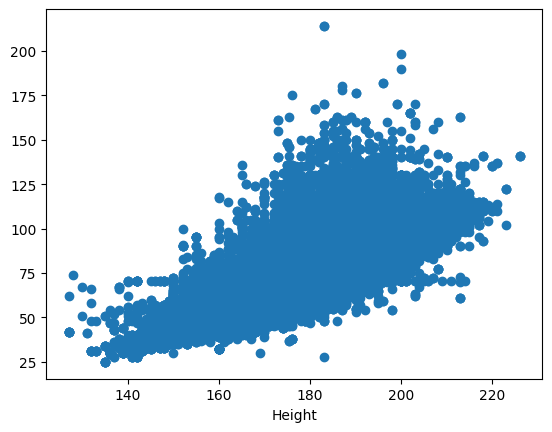

In [48]:
x = ath.Height
y = ath.Weight
plt.xlabel("Height")
plt.xlabel("Weight")
plt.title("Height vs Weight")
plt.scatter(x,y)
plt.show()

2 . Find out how many male and female had participated in the olympic during 1896 to 2016

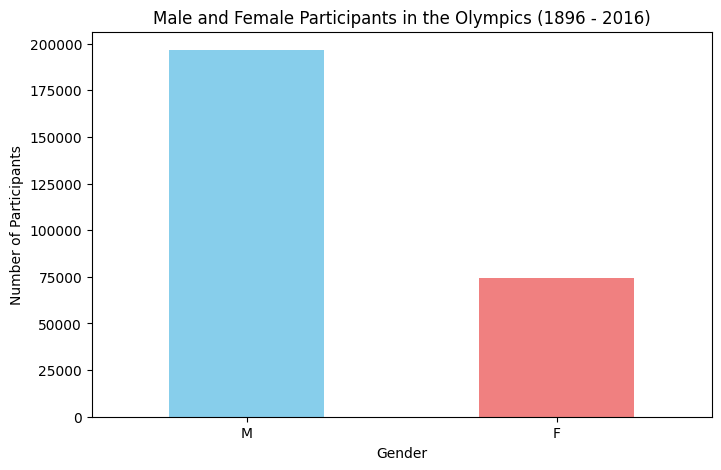

In [49]:

# Step 1: Filter the data for the years 1896 to 2016
olympic_data = ath[(ath['Year'] >= 1896) & (ath['Year'] <= 2016)]

# Step 2: Count the number of male and female participants
gender_counts = olympic_data['Sex'].value_counts()

# Step 3: Plotting
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Male and Female Participants in the Olympics (1896 - 2016)")
plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
plt.show()


3. How many male and Female has participated in the Summer and Winter Olympics

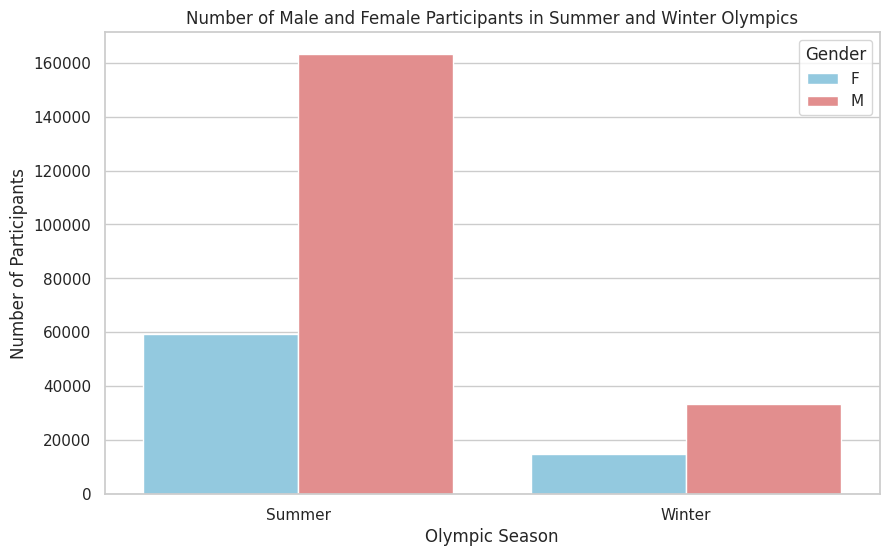

In [50]:

# Step 1: Filter and count participants by season and gender
season_gender_counts = ath.groupby(['Season', 'Sex']).size().reset_index(name='Count')

# Step 2: Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(data=season_gender_counts, x='Season', y='Count', hue='Sex', palette=['skyblue', 'lightcoral'])

# Step 3: Customize the plot
plt.title("Number of Male and Female Participants in Summer and Winter Olympics")
plt.xlabel("Olympic Season")
plt.ylabel("Number of Participants")
plt.legend(title="Gender")
plt.show()


In [51]:
import plotly as px

In [54]:
import plotly.express as px

# Corrected column name for gender
fig = px.histogram(ath, x="Season", color="Sex", barmode="group")
fig.show()


Output hidden; open in https://colab.research.google.com to view.

4. Name of the Top 5 countries who have the most medals

In [55]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Men's,0
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Men's,0
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Men's,1
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [57]:
# Count medals for each country and display the top 5
top_countries = ath[ath['Medal'].notna()]['Team'].value_counts().nlargest(5)

print("Top 5 countries with the most medals:")
print(top_countries)

Top 5 countries with the most medals:
Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64


In [60]:
import plotly.express as px

# Correct usage: pass the DataFrame directly and specify columns as strings
fig = px.histogram(ath[ath['Medal'].notna()], x="Team")
fig.show()



Output hidden; open in https://colab.research.google.com to view.

In [65]:
ath[ath.Sex == "F"]

,ID,Name,Sex,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33,168.0,80.0,Soviet Union,Russia,1964 Summer,1964,Summer,Tokyo,Athletics,Women's Shot Put,2
271099,135560,Stavroula Zygouri,F,36,171.0,63.0,Greece,Greece,2004 Summer,2004,Summer,Athina,Wrestling,"Women's Middleweight, Freestyle",0
271102,135563,Olesya Nikolayevna Zykina,F,19,171.0,64.0,Russia,Russia,2000 Summer,2000,Summer,Sydney,Athletics,Women's 4 x 400 metres Relay,2
271103,135563,Olesya Nikolayevna Zykina,F,23,171.0,64.0,Russia,Russia,2004 Summer,2004,Summer,Athina,Athletics,Women's 4 x 400 metres Relay,3


In [68]:

fig = px.histogram(ath[ath['Sex'] == 'F'], x="Year", color="Sex")
fig.show()